----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam
 
( 2 of November, 2017 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


# Exercise 1

The purpose of this exercise is to hide Obama's identity to avoid being recognized during the next election ceremony. For that purpose, we will use the well-known Batman's Mask. 

<img src="imagestext/hiddenidentity.jpg" width="200" height="40">

**Hint** Notice that the given mask has noise added that needs to be removed.

**1.1) (0.5 points)** Read images `obamaImage.jpg` and `Noisymaskbatman.jpg` and display them.
<img src="imagestext/obama1.png" width="500" height="1000">


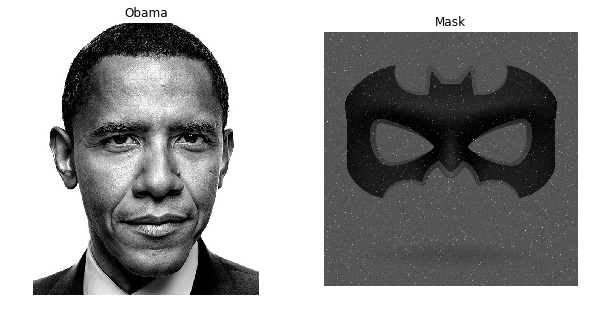

In [147]:
from skimage import io
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline


obama = io.imread("imagesexamen/obamaimage.jpg")
mask = io.imread("imagesexamen/Noisymaskbatman.jpg")


f, axarr = plt.subplots(1, 2) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(10, 5)
    
axarr[0].imshow(obama)
axarr[0].set_axis_off()
axarr[0].set_title("Obama")
axarr[1].imshow(mask, cmap= 'gray')
axarr[1].set_axis_off()
axarr[1].set_title("Mask")

plt.show()

**1.2) (0.5 points)** Convert both images in gray images of the same size and display them.

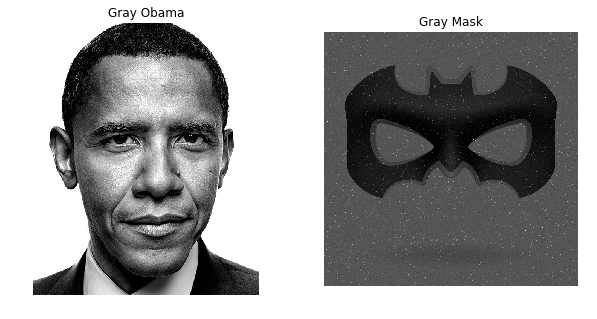

In [148]:
from skimage.color import rgb2gray

grayObama = rgb2gray(obama)
grayMask = rgb2gray(mask)


#-----------------image plotting---------------------
f, axarr = plt.subplots(1, 2) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(10, 5)
    
axarr[0].imshow(grayObama, cmap = 'gray')
axarr[0].set_axis_off()
axarr[0].set_title("Gray Obama")
axarr[1].imshow(grayMask, cmap= 'gray')
axarr[1].set_axis_off()
axarr[1].set_title("Gray Mask")

plt.show()

**1.3) (1 points)** Smooth the mask image to eliminate the noise.  Visualize the filtered and the smoothed masks.
<img src="imagestext/mask1.png" width="600" height="120">


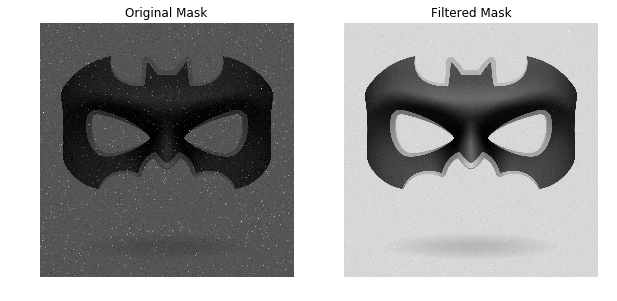

In [149]:
from skimage.filters import median
from skimage.morphology import disk

filteredMask = median(mask, disk(2))

#-----------------image plotting---------------------
f, axarr = plt.subplots(1, 2) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(10, 5)
    
axarr[0].imshow(mask, cmap = 'gray')
axarr[0].set_axis_off()
axarr[0].set_title("Original Mask")
axarr[1].imshow(filteredMask, cmap= 'gray')
axarr[1].set_axis_off()
axarr[1].set_title("Filtered Mask")

**1.3) (2 points)** Binarize the mask to separate it from the background. Use the histogram in order to choose the right threshold. Visualize the filtered and binary masks and the histogram of the filtered mask.
<img src="imagestext/mask2.png" width="600" height="120">


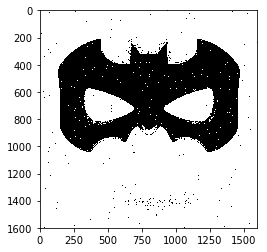

In [152]:
from skimage import exposure
from skimage import img_as_ubyte
from skimage.filters import threshold_mean


thresh = threshold_mean(rgb2gray(filteredMask))
binary = grayMask > thresh
plt.imshow(binary, cmap = 'gray')

**1.4) (1 point)** Overlap the mask on the Obama image

<img src="imagestext/obama2.png" width="200" height="50">


# Exercise 2

**2.1) (1 point)** Read the image `jolie.jpg`, convert in greyscale image and visualize it.
<img src="imagestext/jolie1.png" width="350" height="80">


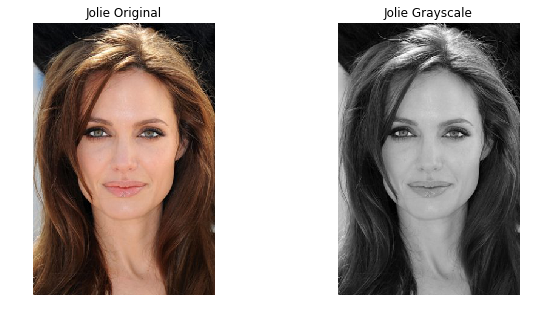

In [76]:
jolie = io.imread("imagesexamen/jolie.jpg")
gray_jolie = rgb2gray(jolie)

#-----------------image plotting---------------------
f, axarr = plt.subplots(1, 2) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(10, 5)
    
axarr[0].imshow(jolie)
axarr[0].set_axis_off()
axarr[0].set_title("Jolie Original")
axarr[1].imshow(gray_jolie, cmap= 'gray')
axarr[1].set_axis_off()
axarr[1].set_title("Jolie Grayscale")

plt.show()

**2.2) (1 points)** Segment the Jolie image using the felzenszwalb segmentation and determine which set of parameters is better: 
i) (scale=50, sigma=5, min_size=50), or
ii) (scale=100, sigma=20, min_size=150). Explain the difference.

Visualize the original image, the greyscale image and the result of the segmentation in the same figure (using subplots).

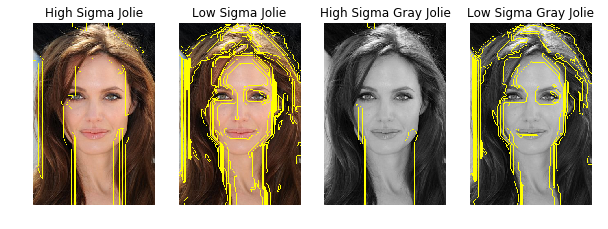

In [87]:
from skimage import segmentation
segmented_jolie_lowSigma = segmentation.felzenszwalb(jolie, scale=50, sigma=5, min_size=50)
segmented_jolie_highSigma = segmentation.felzenszwalb(jolie,scale=100, sigma=20, min_size=150)

segmented_jolie_gray_lowSigma = segmentation.felzenszwalb(gray_jolie, scale=50, sigma=5, min_size=50)
segmented_jolie_gray_highSigma = segmentation.felzenszwalb(gray_jolie,scale=100, sigma=20, min_size=150)

#-----------------image plotting---------------------
f, axarr = plt.subplots(1, 4) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(10, 5)
    
axarr[0].imshow(segmentation.mark_boundaries(jolie,segmented_jolie_highSigma))
axarr[0].set_axis_off()
axarr[0].set_title("High Sigma Jolie")
axarr[1].imshow(segmentation.mark_boundaries(jolie,segmented_jolie_lowSigma))
axarr[1].set_axis_off()
axarr[1].set_title("Low Sigma Jolie")
axarr[2].imshow(segmentation.mark_boundaries(gray_jolie,segmented_jolie_gray_highSigma), cmap = 'gray')
axarr[2].set_axis_off()
axarr[2].set_title("High Sigma Gray Jolie")
axarr[3].imshow(segmentation.mark_boundaries(gray_jolie,segmented_jolie_gray_lowSigma), cmap = 'gray')
axarr[3].set_axis_off()
axarr[3].set_title("Low Sigma Gray Jolie")
plt.show()

##### We can clearly see that the difference between using a high sigma and a low sigma is significant. We obtain a better segmentation with sigma= 5 because sigma is the diameter of the Gaussian kernel used for smoothing the image prior to segmentation, if we smooth the image too much we will obtain les segments.

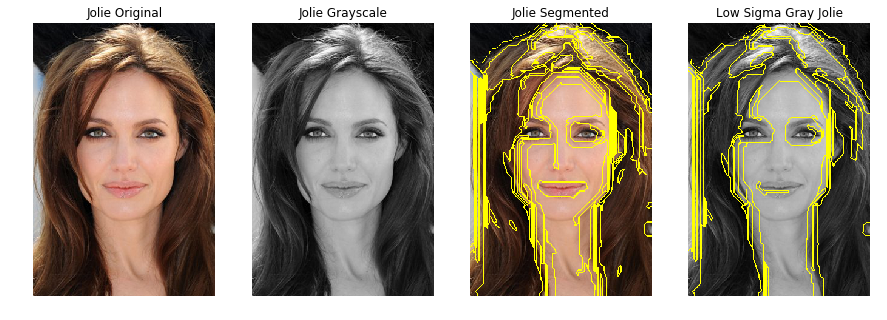

In [134]:
#-----------------image plotting---------------------
f, axarr = plt.subplots(1, 4) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(15, 8)
    
axarr[0].imshow(jolie)
axarr[0].set_axis_off()
axarr[0].set_title("Jolie Original")
axarr[1].imshow(gray_jolie, cmap= 'gray')
axarr[1].set_axis_off()
axarr[1].set_title("Jolie Grayscale")
axarr[2].imshow(segmentation.mark_boundaries(jolie,segmented_jolie_lowSigma))
axarr[2].set_axis_off()
axarr[2].set_title("Jolie Segmented")
axarr[3].imshow(segmentation.mark_boundaries(gray_jolie,segmented_jolie_gray_lowSigma), cmap = 'gray')
axarr[3].set_axis_off()
axarr[3].set_title("Low Sigma Gray Jolie")
plt.show()

**2.3) (1 point)** Check on the histogram how much colors there are at the segmented image of the color and greyscale images using (scale=50, sigma=5, min_size=50) 


**2.3) (0.5 points)** Check the minimum and maximum values of the segmented images. What do these numbers mean? 

In [101]:
print("Orginal Jolie Segmented:",(segmented_jolie_lowSigma.max(),segmented_jolie_lowSigma.min()))
print("Grayscale Jolie Segmented:",(segmented_jolie_gray_lowSigma.max(),segmented_jolie_gray_lowSigma.min()))
print("This numbers are the highest and lowest intesity values between all the pixels of the image")

Orginal Jolie Segmented: (106, 0)
Grayscale Jolie Segmented: (54, 0)
This numbers are the highest and lowest intesity values between all the pixels of the image


**2.4) (1.5 points)** Apply the Canny detector on the Jolie in order to emphasize the borders of the mask using sigma=1 and sigma=2. Overlay the obtained edges on the original image so that the edges with sigma=1 should appear in white and with sigma=2 should appear red as follows.

<img src="./imagestext/jolie.png"  width="500" height="130">

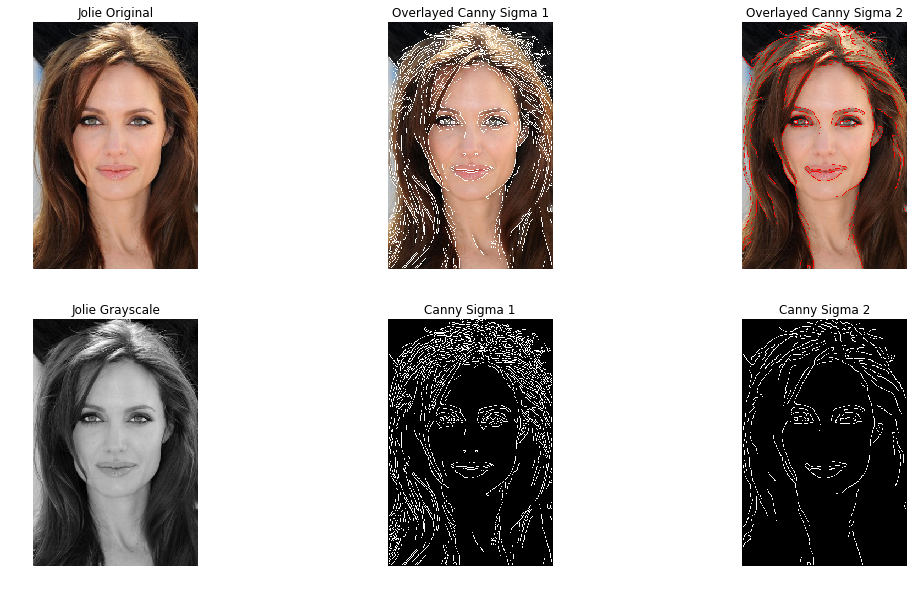

In [133]:
from skimage import feature
jolie = io.imread("imagesexamen/jolie.jpg")
overlay1 = np.copy(jolie)
overlay2 = np.copy(jolie)
canny1 = feature.canny(gray_jolie,sigma=1)
canny2 = feature.canny(gray_jolie,sigma=2)


overlay1[(canny1)] = 255 
overlay2[(canny2)] = [255,0,0]


#-----------------image plotting---------------------
f, axarr = plt.subplots(2, 3) #in order to display the images in a grid we create an array of axes.
f.set_size_inches(18, 10)
    
axarr[0,0].imshow(jolie)
axarr[0,0].set_axis_off()
axarr[0,0].set_title("Jolie Original")
axarr[0,1].imshow(overlay1)
axarr[0,1].set_axis_off()
axarr[0,1].set_title("Overlayed Canny Sigma 1")
axarr[0,2].imshow(overlay2)
axarr[0,2].set_axis_off()
axarr[0,2].set_title("Overlayed Canny Sigma 2")
axarr[1,0].imshow(gray_jolie, cmap = 'gray')
axarr[1,0].set_axis_off()
axarr[1,0].set_title("Jolie Grayscale")
axarr[1,1].imshow(canny1, cmap = 'gray')
axarr[1,1].set_axis_off()
axarr[1,1].set_title("Canny Sigma 1")
axarr[1,2].imshow(canny2, cmap = 'gray')
axarr[1,2].set_axis_off()
axarr[1,2].set_title("Canny Sigma 2")
plt.show()